# CSE1015 - Machine Learning Essentials
# Pinni Venkata Abhiram
# 20BAI1132

### Lab - 8
### K - Means Clustering 

#### Importing all the modules

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [88]:
import warnings

warnings.filterwarnings('ignore')

#### Dataset imports and Preprocessing

In [89]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [90]:
train.head(10)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,54.8,...,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6,V1
1,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,51.8,...,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8,V1
2,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,54.0,...,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9,V1
3,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,57.7,...,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1,V1
4,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,59.1,...,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1,V1
5,2.41,6.54,1.20,2.94,0.05,2.45,0.71,0.69,0.0,47.2,...,44.5,9.39,6.10,6.07,0.02,0.01,21.3,1.6,1.7,V1
6,3.66,7.75,1.84,3.08,0.06,1.67,0.77,0.65,0.0,48.7,...,48.4,7.78,5.57,5.56,0.01,0.00,22.7,1.1,0.6,V1
7,3.73,7.80,1.70,3.22,0.06,1.89,0.77,0.68,0.0,60.7,...,52.8,12.96,6.88,6.50,0.38,0.10,26.3,4.5,2.3,V1
8,3.68,7.61,1.61,3.27,0.05,2.03,0.80,0.70,0.0,59.7,...,53.1,6.95,4.68,4.66,0.33,0.09,26.5,3.4,2.4,V1
9,3.40,7.49,1.52,3.27,0.04,2.14,0.76,0.68,0.0,61.2,...,54.1,9.25,6.70,7.20,0.39,0.11,26.5,4.9,1.5,V1


In [91]:
test.head(10)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,2.85,6.98,1.47,3.03,0.04,2.06,0.74,0.64,0.0,57.1,...,52.7,8.94,6.17,6.43,0.19,0.07,25.3,3.7,1.0,V1
1,3.90,7.92,1.72,3.40,0.05,1.97,0.78,0.66,0.0,63.7,...,54.8,11.04,8.05,7.70,0.71,0.18,27.2,5.5,2.1,V1
2,3.31,7.61,1.44,3.37,0.04,2.34,0.72,0.68,0.0,61.0,...,50.7,7.63,4.85,4.76,0.07,0.02,25.7,5.3,3.1,V1
3,3.71,7.71,1.61,3.27,0.05,2.03,0.79,0.71,0.0,61.7,...,55.6,8.74,6.43,6.56,0.76,0.20,27.4,3.7,1.8,V1
4,3.26,7.42,1.44,3.27,0.05,2.27,0.74,0.69,0.0,61.6,...,53.6,9.89,6.97,6.83,0.34,0.11,26.7,4.6,2.2,V1
5,4.01,8.23,1.61,3.60,0.04,2.24,0.74,0.69,0.0,68.0,...,53.0,10.49,7.19,6.01,0.60,0.15,28.0,6.7,4.5,V1
6,3.13,7.03,1.52,3.01,0.06,1.98,0.80,0.68,0.0,61.8,...,53.2,10.08,6.86,6.38,0.25,0.08,26.4,5.1,2.1,V1
7,3.91,8.18,1.66,3.44,0.04,2.07,0.73,0.68,0.0,55.6,...,53.2,11.27,8.47,8.36,0.62,0.16,25.7,1.9,1.2,V1
8,3.76,7.99,1.52,3.52,0.05,2.31,0.74,0.70,0.0,66.0,...,53.3,6.45,4.81,4.49,0.26,0.07,27.0,7.2,2.8,V1
9,2.97,7.08,1.44,3.10,0.04,2.15,0.74,0.67,0.0,52.5,...,48.7,7.79,5.57,5.80,0.03,0.01,23.6,2.3,1.7,V1


In [92]:
print(train.shape,test.shape)

(400, 21) (100, 21)


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P1            400 non-null    float64
 1   P2            400 non-null    float64
 2   P3            400 non-null    float64
 3   P4            400 non-null    float64
 4   P5            400 non-null    float64
 5   P6            400 non-null    float64
 6   P7            400 non-null    float64
 7   P8            400 non-null    float64
 8   P9            400 non-null    float64
 9   P10           400 non-null    float64
 10  P11           400 non-null    float64
 11  P12           400 non-null    float64
 12  P13           400 non-null    float64
 13  P14           400 non-null    float64
 14  P15           400 non-null    float64
 15  P16           400 non-null    float64
 16  P17           400 non-null    float64
 17  P18           400 non-null    float64
 18  P19           400 non-null    

In [94]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.441575,7.403225,1.595625,3.12340,0.056550,1.970525,0.787700,0.690450,0.020500,103.88375,81.321250,70.146250,13.666600,10.190050,8.39965,0.528475,0.155375,39.988250,10.069250,10.600000
std,0.395690,0.421662,0.140773,0.19666,0.015188,0.196999,0.027931,0.017652,0.092878,40.77963,44.305153,36.149349,3.934187,3.384236,3.35507,1.017907,0.301290,16.699209,5.942395,6.213398
min,2.410000,6.280000,1.180000,2.60000,0.020000,1.220000,0.670000,0.640000,0.000000,43.30000,42.600000,42.100000,5.700000,4.070000,3.49000,0.000000,0.000000,20.200000,0.100000,-0.900000
25%,3.167500,7.100000,1.520000,3.00000,0.040000,1.870000,0.770000,0.680000,0.000000,75.35000,53.675000,49.800000,10.930000,7.607500,6.01750,0.000000,0.000000,28.875000,3.875000,6.400000
50%,3.435000,7.420000,1.610000,3.10000,0.060000,1.980000,0.790000,0.690000,0.000000,95.00000,59.850000,53.200000,13.535000,9.840000,7.34500,0.010000,0.000000,33.500000,11.250000,10.900000
75%,3.710000,7.710000,1.690000,3.27000,0.070000,2.090000,0.810000,0.700000,0.000000,119.92500,77.350000,60.625000,15.922500,12.415000,9.82500,0.270000,0.072500,41.725000,15.325000,14.325000
max,4.720000,8.630000,2.210000,3.69000,0.130000,2.690000,0.870000,0.760000,0.600000,183.20000,183.500000,165.600000,31.000000,22.180000,21.88000,3.730000,0.990000,76.300000,21.800000,28.600000


In [95]:
train.isnull().sum()

P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
P7              0
P8              0
P9              0
P10             0
P11             0
P12             0
P13             0
P14             0
P15             0
P16             0
P17             0
P18             0
P19             0
P20             0
Target Label    0
dtype: int64

In [96]:
test.isnull().sum()

P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
P7              0
P8              0
P9              0
P10             0
P11             0
P12             0
P13             0
P14             0
P15             0
P16             0
P17             0
P18             0
P19             0
P20             0
Target Label    0
dtype: int64

#### Frequency Distribution of the dataset

In [97]:
outcome = pd.crosstab(index= train["Target Label"], columns="count")      # Name the count column
outcome

col_0,count
Target Label,
V1,40
V10,40
V2,40
V3,40
V4,40
V5,40
V6,40
V7,40
V8,40


In [98]:
print (len(test['Target Label'].unique()) , test['Target Label'].unique())

10 ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10']


#### Checking the frequency

In [99]:
outcome = pd.crosstab(index= train["Target Label"], columns="count")      # Name the count column
outcome

col_0,count
Target Label,
V1,40
V10,40
V2,40
V3,40
V4,40
V5,40
V6,40
V7,40
V8,40


In [100]:
outcome2 = pd.crosstab(index= test["Target Label"], columns="count")      # Name the count column
outcome2

col_0,count
Target Label,
V1,10
V10,10
V2,10
V3,10
V4,10
V5,10
V6,10
V7,10
V8,10


In [101]:
train['Target Label'].unique()

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'],
      dtype=object)

In [102]:
columns = list(train.columns)
print(columns, end = " ")

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'Target Label'] 

#### Since the labels are strings we can't apply the K Means Clustering and we need to convert em using Label Encoder from Sklearn Preprocessing

In [103]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Target Label']= label_encoder.fit_transform(train['Target Label'])
train

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,3.30,7.44,1.52,3.27,0.07,2.14,0.75,0.66,0.0,54.8,...,50.7,6.55,4.09,4.26,0.01,0.00,24.7,2.7,1.6,0
1,3.43,7.63,1.63,3.27,0.05,2.01,0.74,0.65,0.0,51.8,...,47.9,8.35,5.08,5.01,0.01,0.00,23.3,2.3,1.8,0
2,3.41,7.32,1.52,3.18,0.07,2.09,0.80,0.70,0.0,54.0,...,54.4,9.27,6.85,7.14,0.19,0.06,25.0,2.5,-0.9,0
3,3.78,7.85,1.69,3.35,0.03,1.98,0.77,0.67,0.0,57.7,...,48.9,10.26,5.96,5.47,0.05,0.01,24.1,5.6,2.1,0
4,3.90,7.99,1.61,3.43,0.02,2.14,0.77,0.71,0.0,59.1,...,54.1,8.19,5.81,4.72,0.64,0.16,26.8,2.5,2.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.78,7.63,1.89,2.91,0.07,1.54,0.82,0.69,0.0,178.1,...,147.0,7.78,10.44,11.53,0.02,0.01,73.2,2.9,10.7,1
396,3.94,7.75,1.78,3.22,0.05,1.81,0.83,0.69,0.0,182.2,...,165.6,12.58,13.42,12.30,0.01,0.00,76.3,2.2,5.2,1
397,3.43,7.39,1.63,3.11,0.05,1.91,0.79,0.68,0.0,171.8,...,148.6,12.81,14.65,14.40,0.01,0.00,71.6,2.9,7.6,1
398,3.96,7.80,1.88,3.03,0.06,1.61,0.82,0.70,0.0,175.0,...,144.1,12.03,13.00,11.39,0.00,0.00,71.9,3.2,10.4,1


In [104]:
test['Target Label']= label_encoder.fit_transform(test['Target Label'])
test

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P12,P13,P14,P15,P16,P17,P18,P19,P20,Target Label
0,2.85,6.98,1.47,3.03,0.04,2.06,0.74,0.64,0.0,57.1,...,52.7,8.94,6.17,6.43,0.19,0.07,25.3,3.7,1.0,0
1,3.90,7.92,1.72,3.40,0.05,1.97,0.78,0.66,0.0,63.7,...,54.8,11.04,8.05,7.70,0.71,0.18,27.2,5.5,2.1,0
2,3.31,7.61,1.44,3.37,0.04,2.34,0.72,0.68,0.0,61.0,...,50.7,7.63,4.85,4.76,0.07,0.02,25.7,5.3,3.1,0
3,3.71,7.71,1.61,3.27,0.05,2.03,0.79,0.71,0.0,61.7,...,55.6,8.74,6.43,6.56,0.76,0.20,27.4,3.7,1.8,0
4,3.26,7.42,1.44,3.27,0.05,2.27,0.74,0.69,0.0,61.6,...,53.6,9.89,6.97,6.83,0.34,0.11,26.7,4.6,2.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.26,7.20,1.61,3.01,0.05,1.87,0.79,0.67,0.0,173.5,...,129.9,11.61,13.96,13.74,0.01,0.00,69.6,4.6,15.0,1
96,3.56,7.46,1.66,3.10,0.07,1.86,0.81,0.69,0.0,172.7,...,140.3,10.51,12.70,12.59,0.03,0.01,70.8,3.4,11.0,1
97,4.73,8.73,1.95,3.59,0.03,1.84,0.78,0.67,0.0,171.6,...,147.7,14.37,15.69,14.97,0.09,0.02,71.5,2.9,7.9,1
98,3.66,7.63,1.70,3.14,0.05,1.85,0.79,0.68,0.0,175.9,...,131.2,11.23,16.31,18.52,0.03,0.01,70.7,3.8,15.9,1


In [105]:
train['Target Label'].unique()

array([0, 2, 3, 4, 5, 6, 7, 8, 9, 1])

In [106]:
test['Target Label'].unique()

array([0, 2, 3, 4, 5, 6, 7, 8, 9, 1])

### Implementing K means Clustering

#### With the train set we can get the number of optimal clusters 

#### Normalising the train set before working with it

In [107]:
train = preprocessing.normalize(train)

In [108]:
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

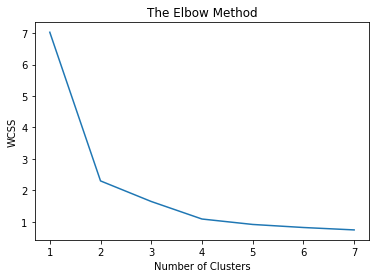

In [109]:
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

#### From the above plot, we observe, while the x axis value goes from 1 to 4 the WCSS decreases rapidly, and while the x axis value goes from 4 to 7, the WCSS decreases slowly.

#### This tells us the optimal number of clusters are 4.

#### silhouette score  = p−q/max(p,q)
#### p  is the mean distance to the points in the nearest cluster that the data point is not a part of
#### q  is the mean intra-cluster distance to all the points in its own cluster.
#### The value of the silhouette score range lies between -1 to 1.  A score closer to 1 indicates that the data point is very similar to other data points in the cluster,  A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [110]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8 , 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(train)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(train, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5722121358506714
For n_clusters=3, the silhouette score is 0.5579886478297429
For n_clusters=4, the silhouette score is 0.4463240731520365
For n_clusters=5, the silhouette score is 0.40110067312056286
For n_clusters=6, the silhouette score is 0.3981587734255578
For n_clusters=7, the silhouette score is 0.36234237813795317
For n_clusters=8, the silhouette score is 0.3375254873503819
For n_clusters=10, the silhouette score is 0.35405123815116946


#### From the above analysis we can say that 2 cluster result is the best result

In [111]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
X = test.iloc[:, [3, 5]].values
y_kmeans = kmeans.fit_predict(X)
cluster_labels = kmeans.labels_
label = y_kmeans

In [112]:
print(y_kmeans)



[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0]


In [113]:
kmeans.cluster_centers_

array([[3.00238095, 1.80190476],
       [3.26034483, 2.1062069 ]])

In [114]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [115]:
test['Cluster_Id'] = kmeans.labels_
test

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P13,P14,P15,P16,P17,P18,P19,P20,Target Label,Cluster_Id
0,2.85,6.98,1.47,3.03,0.04,2.06,0.74,0.64,0.0,57.1,...,8.94,6.17,6.43,0.19,0.07,25.3,3.7,1.0,0,1
1,3.90,7.92,1.72,3.40,0.05,1.97,0.78,0.66,0.0,63.7,...,11.04,8.05,7.70,0.71,0.18,27.2,5.5,2.1,0,1
2,3.31,7.61,1.44,3.37,0.04,2.34,0.72,0.68,0.0,61.0,...,7.63,4.85,4.76,0.07,0.02,25.7,5.3,3.1,0,1
3,3.71,7.71,1.61,3.27,0.05,2.03,0.79,0.71,0.0,61.7,...,8.74,6.43,6.56,0.76,0.20,27.4,3.7,1.8,0,1
4,3.26,7.42,1.44,3.27,0.05,2.27,0.74,0.69,0.0,61.6,...,9.89,6.97,6.83,0.34,0.11,26.7,4.6,2.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.26,7.20,1.61,3.01,0.05,1.87,0.79,0.67,0.0,173.5,...,11.61,13.96,13.74,0.01,0.00,69.6,4.6,15.0,1,0
96,3.56,7.46,1.66,3.10,0.07,1.86,0.81,0.69,0.0,172.7,...,10.51,12.70,12.59,0.03,0.01,70.8,3.4,11.0,1,0
97,4.73,8.73,1.95,3.59,0.03,1.84,0.78,0.67,0.0,171.6,...,14.37,15.69,14.97,0.09,0.02,71.5,2.9,7.9,1,1
98,3.66,7.63,1.70,3.14,0.05,1.85,0.79,0.68,0.0,175.9,...,11.23,16.31,18.52,0.03,0.01,70.7,3.8,15.9,1,0


### Plots and Visuals

#### This boxplots will tell how many cluster ID and P1/P2/P3/P4/P5/P6 and so on are marked as 0 and 1 and so on. 

<AxesSubplot:xlabel='Cluster_Id', ylabel='P1'>

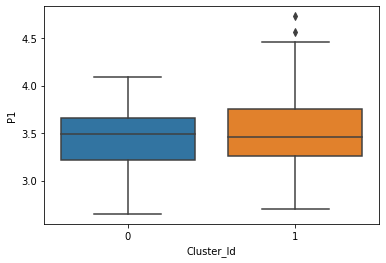

In [116]:
sns.boxplot(x='Cluster_Id', y='P1', data= test)

<AxesSubplot:xlabel='Cluster_Id', ylabel='P2'>

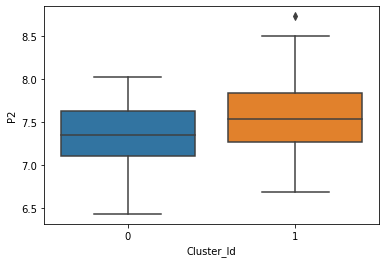

In [117]:
sns.boxplot(x='Cluster_Id', y='P2', data= test)


<AxesSubplot:xlabel='Cluster_Id', ylabel='P3'>

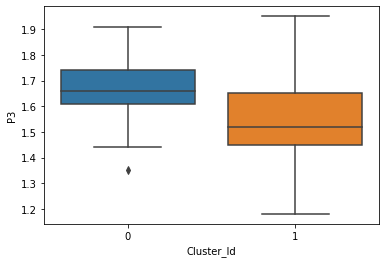

In [118]:
sns.boxplot(x='Cluster_Id', y='P3', data= test)

<AxesSubplot:xlabel='Cluster_Id', ylabel='P4'>

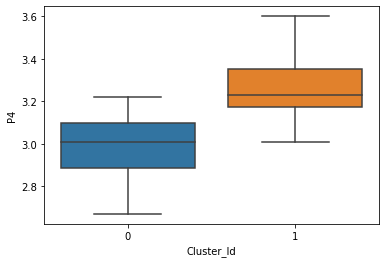

In [119]:
sns.boxplot(x='Cluster_Id', y='P4', data= test)


<AxesSubplot:xlabel='Cluster_Id', ylabel='P5'>

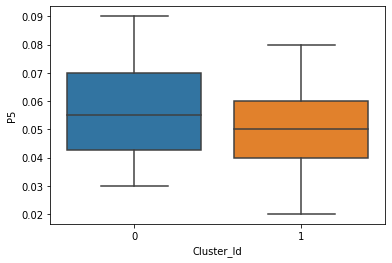

In [120]:
sns.boxplot(x='Cluster_Id', y='P5', data= test)

<AxesSubplot:xlabel='Cluster_Id', ylabel='P6'>

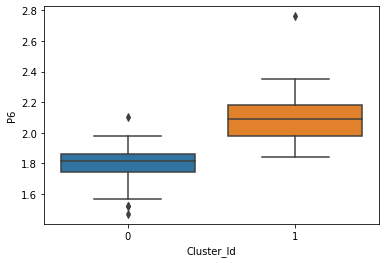

In [121]:
sns.boxplot(x='Cluster_Id', y='P6', data= test)

#### Visualising the clusters

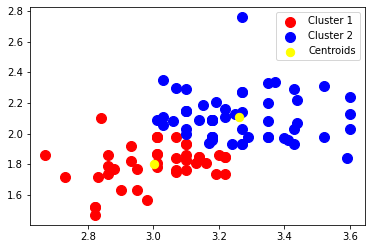

In [122]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

#### Metrics

In [123]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(test['Cluster_Id'],test['Target Label']))

[[1 9 2 2 4 5 5 5 4 5]
 [9 1 8 8 6 5 5 5 6 5]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [124]:
print(classification_report(test['Cluster_Id'],test['Target Label']))

              precision    recall  f1-score   support

           0       0.10      0.02      0.04        42
           1       0.10      0.02      0.03        58
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.02       100
   macro avg       0.02      0.00      0.01       100
weighted avg       0.10      0.02      0.03       100



In [125]:
labels = kmeans.labels_
correct_labels = sum(test['Target Label'] == labels)

print("Result: %d out of %d samples were correctly labeled." %
      (correct_labels, test['Target Label'].size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(test['Target Label'].size)))

Result: 2 out of 100 samples were correctly labeled.
Accuracy score: 0.02


### Therefore the K Means Clustering is implemented sucessfully